In [346]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Load the necessary files using pandas 
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

### Data Understanding 

We have imported the necessary files into the pandas dataframe, we would now need to get ourself familarize with the data

In [19]:
print(listings.columns)
print(listings.shape)
listings.head()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
print(calendar.columns)
print(calendar.shape)
calendar.head()

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
print(reviews.columns)
print(reviews.shape)
reviews.head()

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Business Question 1: Determine the time of the year when prices are high
The first question we will try to figure out is whether we can determine the time of the year when the seatle Airbnb prices are high or low or how the fluctuation occurs year-round based on the pricing. 

In [26]:
# Check the number of null values in each feature of calendar dataset
calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [28]:
# we will remove all the rows that does not have pricing information 
# We decided to remove the rows instead of filling the NaN falues 
# because the algorithm to fill NaN may not accurately represent the actual price of that listing

new_calendar = calendar[~calendar['price'].isna()]
new_calendar.shape

(934542, 4)

In [33]:
new_calendar.price.dtype

dtype('float64')

In [32]:
# convert the dates to pandas datetime 
new_calendar['date'] = pd.to_datetime(new_calendar['date'])

# convert the price column format to a float format
new_calendar[['price']] = new_calendar[['price']].replace('[\$,]','',regex=True).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [36]:
new_calendar.price.dtype

dtype('float64')

In [37]:
new_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


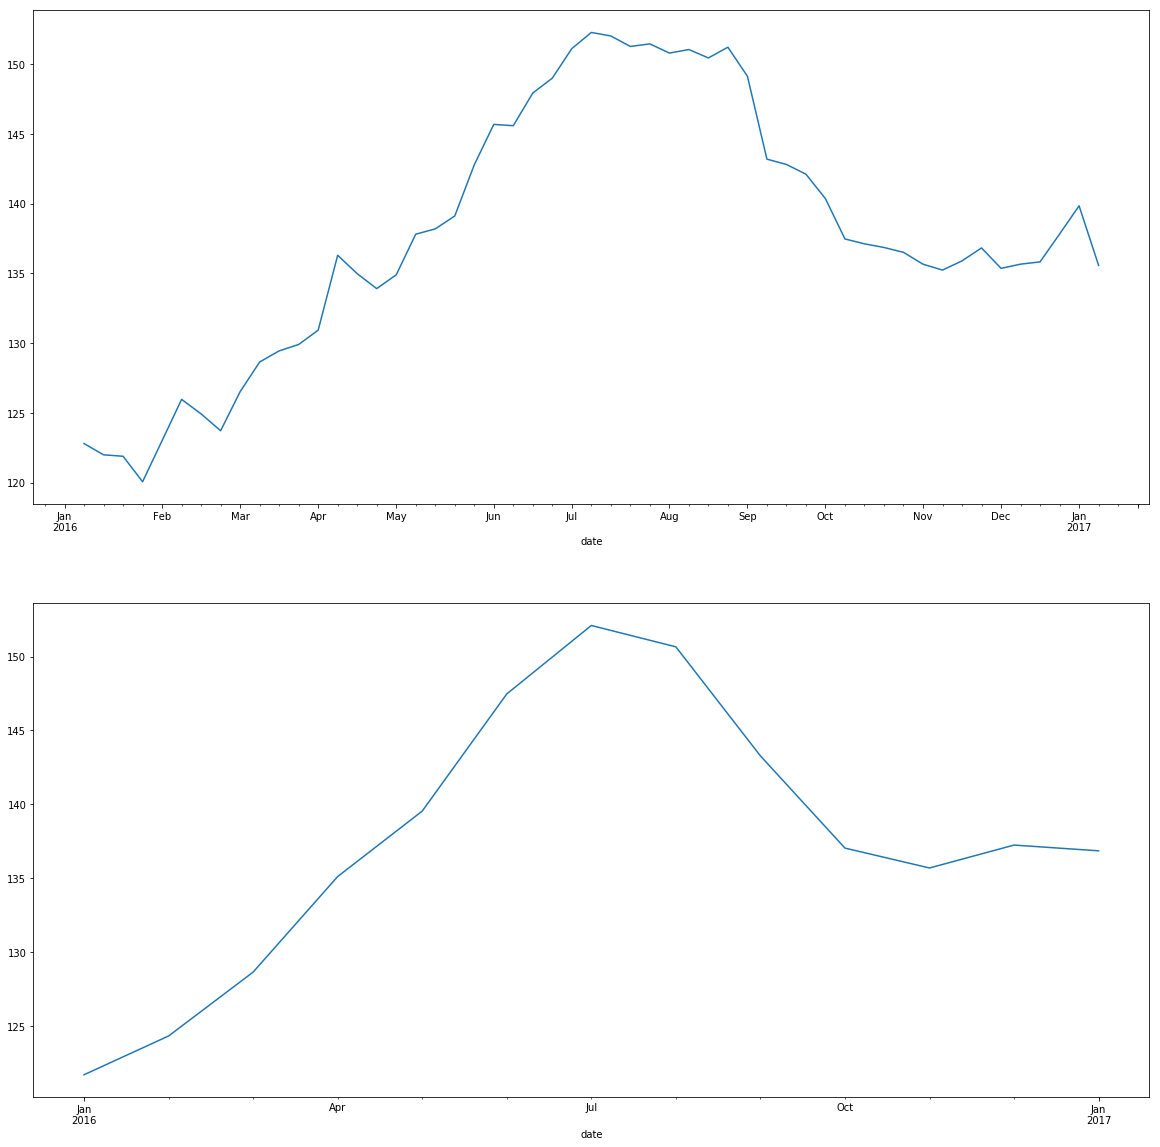

In [174]:
x = new_calendar.groupby(['date'])['price'].mean()
fig = plt.figure(figsize=(20,20))
plt.subplot(211)
x.resample('W').mean().plot()
plt.subplot(212)
x.resample('M').mean().plot()

We can see from the line graph that the prices reach it's all time high during the months of june, july, aug, sep which also implies that these are the busiest season of Seattle in a year. Prices steadily goes up peaking in the month of July and starts to decline with small margins till december. The average listing price of the houses during July 2016 were up by almost 25% compared to jan of 2016 and again dropped by 6.50% by the jan of 2017.

### Business Question 2: How comparitive are different neighbourhoods of the seatle based on the price

In general neighbourhoods might have great influence on the listing price. We should see how comparitive different neighbourhoods are based on listing prices

In [382]:
# First of all lets see how overall pricing looks like in seatle 
new_calendar.price.value_counts()

150.0    36646
100.0    31755
75.0     29820
125.0    27538
65.0     26415
90.0     24942
95.0     24327
99.0     23629
85.0     23455
80.0     19817
110.0    19454
120.0    19145
70.0     18439
60.0     18004
175.0    17707
250.0    16870
55.0     16864
200.0    16144
50.0     15978
115.0    14775
40.0     13357
69.0     12922
135.0    11455
105.0    11062
130.0    11008
89.0     10355
79.0     10133
225.0     8163
45.0      8134
129.0     8111
         ...  
618.0        1
451.0        1
646.0        1
643.0        1
623.0        1
788.0        1
625.0        1
637.0        1
685.0        1
686.0        1
693.0        1
583.0        1
553.0        1
554.0        1
745.0        1
743.0        1
737.0        1
562.0        1
733.0        1
566.0        1
567.0        1
727.0        1
668.0        1
723.0        1
744.0        1
780.0        1
711.0        1
481.0        1
423.0        1
722.0        1
Name: price, Length: 669, dtype: int64

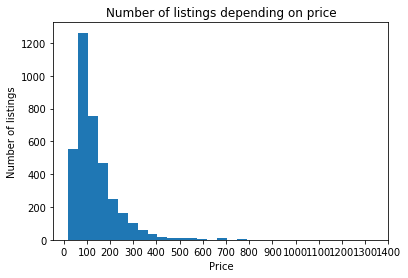

In [52]:
# Get the average price for each listing
# We have already removed the indexes where price is not available
each_listing_mean_price = new_calendar.groupby('listing_id').mean()['price']

#plot
plt.figure()
plt.hist(each_listing_mean_price, bins=30)
plt.xticks(np.arange(0,1500, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price')
plt.title('Number of listings depending on price')

plt.show()

From the above graph we can see that it is highly left skewed and most of the houses are listed between 100 and 200 USD. However, we think that the price may very based on the neighbourhood or the locality of the listing so lets check if our hypothesis is correct or not.

In [101]:
# First of all to get tha analysis based on the neighbourhood we need to merge the Calendar and listing datasets
new_listings = listings.rename(index=str, columns={"id": "listing_id"})
calendar_listings = pd.merge(new_calendar, new_listings, on = 'listing_id')
calendar_listings.head()

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-13,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-14,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-18,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [102]:
# The only relevant features for this analysis are [listing_id], [date], [price], [neighbourhood_cleansed] and [neighbourhood_group_cleansed]

neighbourhood_analysis = calendar_listings[["listing_id", "date", "price_x", "neighbourhood_cleansed", "neighbourhood_group_cleansed"]]
neighbourhood_analysis.head()

,listing_id,date,price_x,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,2016-01-04,85.0,West Queen Anne,Queen Anne
1,241032,2016-01-05,85.0,West Queen Anne,Queen Anne
2,241032,2016-01-13,85.0,West Queen Anne,Queen Anne
3,241032,2016-01-14,85.0,West Queen Anne,Queen Anne
4,241032,2016-01-18,85.0,West Queen Anne,Queen Anne


In [103]:
# Lets check the number of NaN for each feature of neighbourhood_analysis 
neighbourhood_analysis.isna().sum()

listing_id                      0
date                            0
price_x                         0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
dtype: int64

In [104]:
# Since we used already cleaned Calendar data, this time we did not got any missing values in our neighbourhood_analysis dataset

# Now lets see the mean price based on each neighbourhood group
neighbourhood_analysis.groupby('neighbourhood_group_cleansed')["price_x"].mean().reset_index().sort_values(by=['price_x'], ascending=False)

,neighbourhood_group_cleansed,price_x
9,Magnolia,198.694341
6,Downtown,187.343042
12,Queen Anne,176.117882
3,Cascade,154.033178
16,West Seattle,148.155804
4,Central Area,134.883729
2,Capitol Hill,134.671895
0,Ballard,125.905980
11,Other neighborhoods,125.622015
7,Interbay,118.421037


From the above table we can see that Magnolia is the most expensive neighbourhood in airbnb listings followed by Downtown and Queen Anne. Whereas Delridge and Northgate have some of the cheapest airbnb listing.

In [106]:
# Now lets get the monthwise analysis of each neighbourhood 
neighbourhood_analysis['month'] = neighbourhood_analysis['date'].dt.month
neighbourhood_analysis = neighbourhood_analysis.groupby(['month','neighbourhood_group_cleansed'])['price_x'].mean().reset_index()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
neighbourhood_analysis

,month,neighbourhood_group_cleansed,price_x
0,1,Ballard,108.986406
1,1,Beacon Hill,97.777725
2,1,Capitol Hill,123.823421
3,1,Cascade,139.289689
4,1,Central Area,120.513238
5,1,Delridge,78.060000
6,1,Downtown,153.544756
7,1,Interbay,118.723636
8,1,Lake City,88.437179
9,1,Magnolia,187.909692


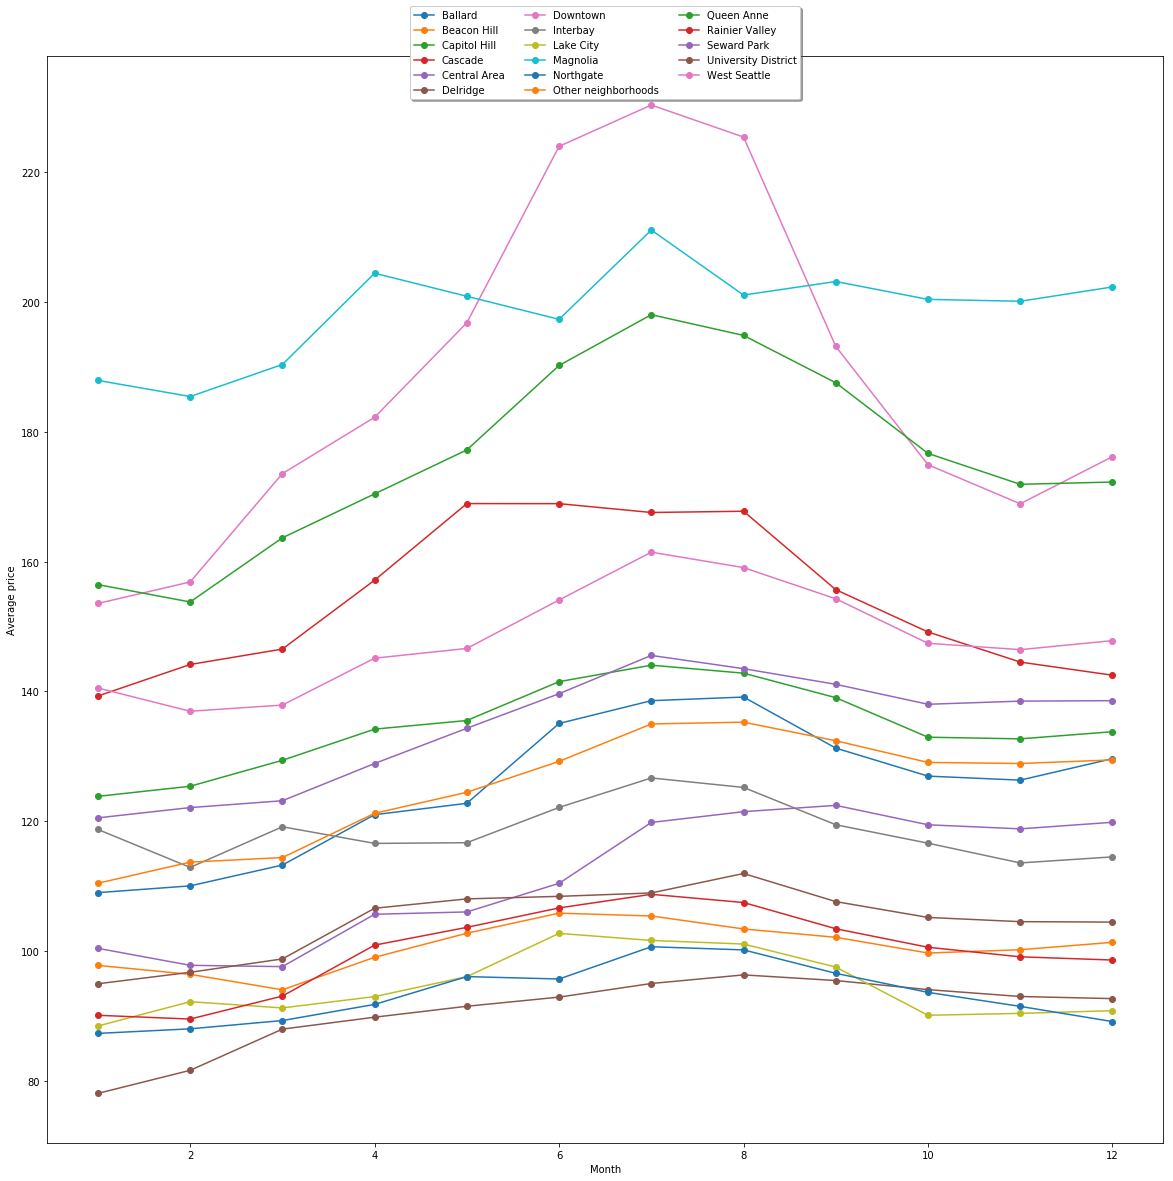

In [132]:

#plot prices for each neighbourhood
neighbourhood_groups = neighbourhood_analysis.neighbourhood_group_cleansed.unique()

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)

for neighbourhood in neighbourhood_groups:
    ax.plot(neighbourhood_analysis[neighbourhood_analysis['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             neighbourhood_analysis[neighbourhood_analysis['neighbourhood_group_cleansed'] == neighbourhood]['price_x'],
             label = neighbourhood, marker='o')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.ylabel('Average price')
plt.xlabel('Month')

fig.show()

From the above fig we can see how the price fluctuation that happened over the year 2016 for all the neighbourhood groups. There are lot of neighbourhoods that showed little to no fixed trend of price change, some of such neighbourhoods are Magnolia, Ballard or delridge. Whereas Some neighbourhoods such as Downtown, Queen Anne showed similar price trend as we saw in the analysis of our first business question.

### Business question 3: What is busiest time to visit seatle 

The busiest time in Seattle can be analysed by looking at the number of unavailable listings over all the neighbourhoods of seatle over the year. 

In [149]:
# For this analysis we would use Calendar dataset 

busy_time = calendar.copy()

# convert the dates to pandas datetime 
busy_time['date'] = pd.to_datetime(busy_time['date'])

# convert the price column format to a float format
busy_time[['price']] = busy_time[['price']].replace('[\$,]','',regex=True).astype(float)

busy_time.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [150]:
# Select all the indexes when the listing is unavailable
busy_time_unavailable = busy_time[busy_time['available']=='f']

# Group by date 
busy_time_unavailable = busy_time_unavailable.groupby('date')['listing_id'].count()

In [151]:
busy_time_unavailable

date
2016-01-04    2083
2016-01-05    1951
2016-01-06    1992
2016-01-07    2042
2016-01-08    2036
2016-01-09    1962
2016-01-10    1809
2016-01-11    1738
2016-01-12    1704
2016-01-13    1721
2016-01-14    1758
2016-01-15    1830
2016-01-16    1857
2016-01-17    1746
2016-01-18    1587
2016-01-19    1544
2016-01-20    1529
2016-01-21    1563
2016-01-22    1586
2016-01-23    1582
2016-01-24    1522
2016-01-25    1468
2016-01-26    1462
2016-01-27    1487
2016-01-28    1542
2016-01-29    1558
2016-01-30    1556
2016-01-31    1450
2016-02-01    1405
2016-02-02    1380
              ... 
2016-12-04    1036
2016-12-05    1034
2016-12-06    1030
2016-12-07    1028
2016-12-08    1026
2016-12-09    1025
2016-12-10    1023
2016-12-11    1023
2016-12-12    1020
2016-12-13    1019
2016-12-14    1015
2016-12-15    1009
2016-12-16    1005
2016-12-17    1003
2016-12-18    1001
2016-12-19    1000
2016-12-20    1000
2016-12-21     999
2016-12-22     998
2016-12-23     996
2016-12-24     996
2016-12

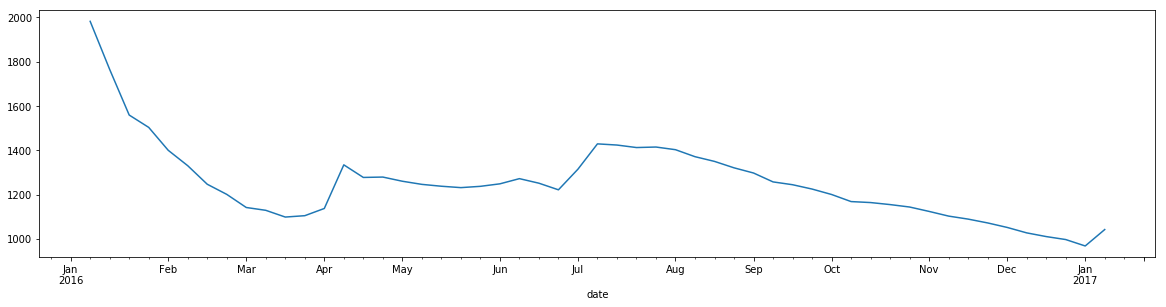

In [154]:
plt.figure(figsize=(20,10))
plt.subplot(211)
busy_time_unavailable.resample('W').mean().plot()

From the above figure we can see that Jan is the busiest time to visit seatle since number of unavailable listings are quite high compared to other months. However, availability increases towards march and stays pretty much constant till july and then again gradually increases even more towards december. 

The interesting fact about Airbnb seatle data from rudimentry analysis based on business question 1 and question 2 can show us that when the availability was low the listing pricing were also low, however, when the availability was relatively high the listing pricings were also high across all the neaghbourhood. This however would still need a further investigation and research. 

Now Lets find out which locality has a lot of airbnb listings or which neighbourhood have higher popularity for listings. 

In [169]:
# For this analysis we will use listings dataset along with our calendar dataset

popular_neighbourhood = pd.merge(busy_time, new_listings, how='left', on=['listing_id'])

popular_neighbourhood = popular_neighbourhood[['listing_id', 'date', 'available', 'neighbourhood_group_cleansed']]

popular_neighbourhood

,listing_id,date,available,neighbourhood_group_cleansed
0,241032,2016-01-04,t,Queen Anne
1,241032,2016-01-05,t,Queen Anne
2,241032,2016-01-06,f,Queen Anne
3,241032,2016-01-07,f,Queen Anne
4,241032,2016-01-08,f,Queen Anne
5,241032,2016-01-09,f,Queen Anne
6,241032,2016-01-10,f,Queen Anne
7,241032,2016-01-11,f,Queen Anne
8,241032,2016-01-12,f,Queen Anne
9,241032,2016-01-13,t,Queen Anne


In [170]:
# Filter for when listing is not available
popular_neighbourhood = popular_neighbourhood[popular_neighbourhood['available']=='f']

popular_neighbourhood['month'] = popular_neighbourhood['date'].dt.month

# Group by date 
popular_neighbourhood = popular_neighbourhood.groupby(['month', 'neighbourhood_group_cleansed'])['listing_id'].count().reset_index()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [171]:
popular_neighbourhood

,month,neighbourhood_group_cleansed,listing_id
0,1,Ballard,3222
1,1,Beacon Hill,1430
2,1,Capitol Hill,7745
3,1,Cascade,1448
4,1,Central Area,5178
5,1,Delridge,920
6,1,Downtown,6393
7,1,Interbay,55
8,1,Lake City,649
9,1,Magnolia,468


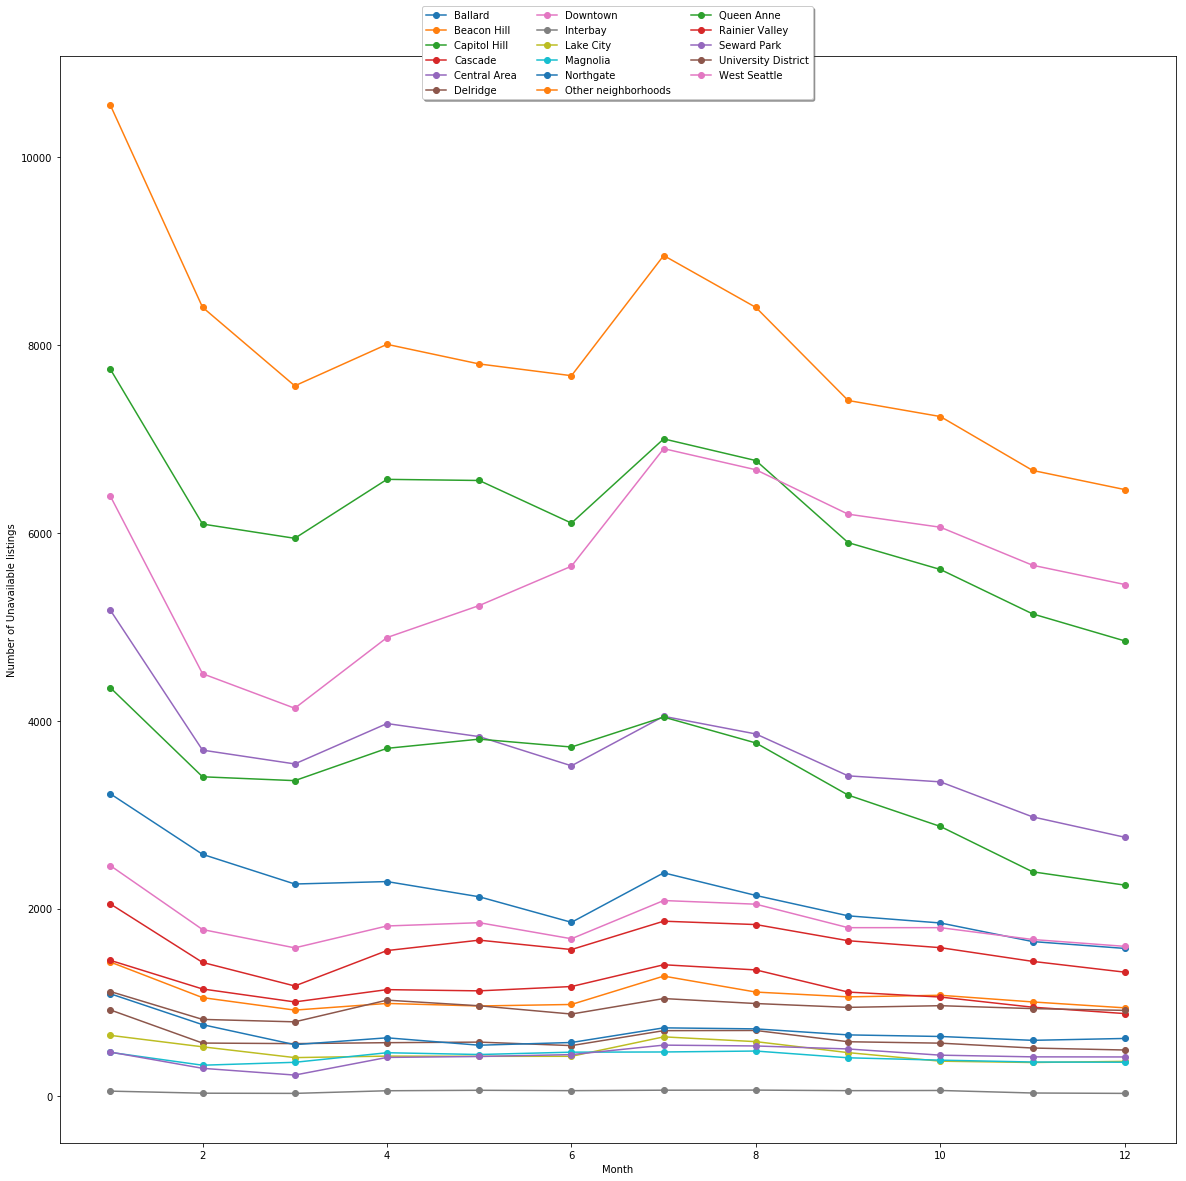

In [173]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)

for neighbourhood in neighbourhood_groups:
    ax.plot(popular_neighbourhood[popular_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             popular_neighbourhood[popular_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['listing_id'],
             label = neighbourhood, marker='o')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.ylabel('Number of Unavailable listings')
plt.xlabel('Month')

fig.show()

The above graph shows the number of unavailable listings in each month for all the neighbourhood groups over the year 2016.  

### Business question 4: Is it possible to predict the listing price based on the information avialable 

To answer this question we will have to gather all the necessary information about lising price and other listing features that could lead us to some conclusion. Most of these information lies in the datasets such as listing and Calendar. So the process we would now follow to create a machine learning model and to predict the listing price is as follows:
    1. Data Gathering 
        a. Merge the listing and Calendar dataset on listing_id
    2. Data Pre-processing
        b. Check if we have any feature with lot of missing values and decide how to handle those.
        c. Remove the features that may not add any value to predicting the listing price.
        d. If the feature is important but has some missing values, decide how we want to handle it.
        e. Reformat the catagorical features 
        f. Once we have the dataset cleaned and ready we may want to use some feature scaling and dimentionality reduction algorithms to make our ML models more efficient
    3. Building ML model
        g. Splitting the dataset in train and test models
        h. Use the train set to train different ML algorithms and test set to validate the model.

In [175]:
# We have already merged the listing and calendar dataset 
calendar_listings.head()

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-13,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-14,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-18,t,85.0,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [185]:
# check all the features for missing values
# Remove any features that has more than 80% data missing
columns_to_remove = []
for column in calendar_listings.columns:
    if calendar_listings[column].isna().sum() * 100 / len(calendar_listings) > 80.0:
        columns_to_remove.append(column)
        
print(columns_to_remove)
df = calendar_listings.drop(columns_to_remove, axis=1)
df.shape

['square_feet', 'license']


(934542, 93)

In [209]:
# First lets separate the numerical and categorical data
df_numerical = df.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
print(df_numerical.shape)

df_categorical = df.select_dtypes(include= ['object', 'datetime64'])
print(df_categorical.shape)


(934542, 29)
(934542, 64)


In [210]:
# Lets clean the numerical dataset first 

# We will first remove all the ids from the numerical dataset
feature_droplist = ['listing_id','scrape_id','host_id','latitude','longitude']
df_numerical = df_numerical.drop(feature_droplist, axis=1)
print(df_numerical.shape)
df_numerical.head() 

(934542, 24)


,price_x,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,85.0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,85.0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
2,85.0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
3,85.0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
4,85.0,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07


In [212]:
# Lets check the missing value counts of remaining features 
df_numerical.isna().sum()*100/len(df_numerical)

price_x                            0.000000
host_listings_count                0.009844
host_total_listings_count          0.009844
accommodates                       0.000000
bathrooms                          0.513942
bedrooms                           0.214330
beds                               0.039057
guests_included                    0.000000
minimum_nights                     0.000000
maximum_nights                     0.000000
availability_30                    0.000000
availability_60                    0.000000
availability_90                    0.000000
availability_365                   0.000000
number_of_reviews                  0.000000
review_scores_rating              15.466079
review_scores_accuracy            15.680622
review_scores_cleanliness         15.615029
review_scores_checkin             15.710155
review_scores_communication       15.568268
review_scores_location            15.624338
review_scores_value               15.634824
calculated_host_listings_count  

In [216]:
# Looking at the above statistics we can safely say that no feature have outragious missing value count 
# So lets fill the missing values by propagating non-null values forward of that respective feature

df_numerical = df_numerical.fillna(method='ffill')
df_numerical.isna().sum()

price_x                           0
host_listings_count               0
host_total_listings_count         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

In [278]:
# Now lets clean and reformat the categorical dataset

# First of all lets remove the unnecessary and redundant information from Categorical dataset
# We dont need 'neighbourhood','host_neighbourhood','neighbourhood_cleansed' these columns since the information 
# is better encoded in `neighbourhood_group_cleansed`
feature_droplist = ['neighbourhood','host_neighbourhood','neighbourhood_cleansed', 'city','street','smart_location',
                    'first_review','last_review','calendar_updated', 'listing_url', 'available', 'has_availability',
                   'requires_license', 'jurisdiction_names', 'calendar_last_scraped', 'host_thumbnail_url', 
                    'thumbnail_url', 'medium_url', 'host_url', 'picture_url', 'xl_picture_url', 'host_since',
                    'weekly_price', 'monthly_price', 'name', 'host_picture_url', 'host_name', 'state', 'host_location',
                   'host_about', 'host_verifications']
df_categorical = df_categorical.drop(feature_droplist, axis=1)
df_categorical.head()

,date,last_scraped,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_response_time,...,bed_type,amenities,price_y,security_deposit,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-01-04,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,within a few hours,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
1,2016-01-05,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,within a few hours,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
2,2016-01-13,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,within a few hours,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
3,2016-01-14,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,within a few hours,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
4,2016-01-18,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,within a few hours,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f


In [279]:
# We also want to remove all the features that has only one values across the dataset
feature_droplist = []
for column in df_categorical.columns:
    if len(df_categorical[column].unique()) == 1:
        feature_droplist.append(column)

print(feature_droplist)        
df_categorical = df_categorical.drop(feature_droplist, axis=1)
df_categorical.head()

['last_scraped', 'experiences_offered', 'market', 'country_code', 'country']


,date,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,...,bed_type,amenities,price_y,security_deposit,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
1,2016-01-05,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
2,2016-01-13,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
3,2016-01-14,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f
4,2016-01-18,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,$5.00,f,moderate,f,f


In [280]:
# Fix the zipcode features 
print(df_categorical['zipcode'].unique())
df_categorical.loc[df_categorical['zipcode'] == '99\n98122', 'zipcode'] = '98122'
print(df_categorical['zipcode'].unique())

['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '99\n98122' '98121' '98102' '98199' '98104'
 '98134' '98136' '98126' '98146' '98116' '98177' '98118' '98108' '98133'
 '98106' '98178' '98125']
['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '98121' '98102' '98199' '98104' '98134' '98136'
 '98126' '98146' '98116' '98177' '98118' '98108' '98133' '98106' '98178'
 '98125']


In [281]:
# Encode the categorical features, we will use pandas_getdummies function
binary_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact'
             ,'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']

df_categorical[binary_cols] = np.where(df_categorical[binary_cols]=='t', 1, 0)

multi_level_cols = ['host_response_time','neighbourhood_group_cleansed','zipcode'
             ,'property_type','room_type','bed_type','cancellation_policy']
df_categorical = pd.get_dummies(data=df_categorical, columns=multi_level_cols, drop_first=True)

df_categorical.head()

,date,summary,space,description,neighborhood_overview,notes,transit,host_response_rate,host_acceptance_rate,host_is_superhost,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,96%,100%,0,...,0,0,0,0,0,0,0,1,1,0
1,2016-01-05,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,96%,100%,0,...,0,0,0,0,0,0,0,1,1,0
2,2016-01-13,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,96%,100%,0,...,0,0,0,0,0,0,0,1,1,0
3,2016-01-14,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,96%,100%,0,...,0,0,0,0,0,0,0,1,1,0
4,2016-01-18,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,96%,100%,0,...,0,0,0,0,0,0,0,1,1,0


In [283]:
# We need to transform some features that are represented in strings but actually are numerical values values

cols=['host_response_rate','host_acceptance_rate']
df_categorical[cols] = df_categorical[cols].replace('%', '', regex=True).astype(float)
df_categorical[cols] = df_categorical[cols]/100
df_categorical[cols].head()

,host_response_rate,host_acceptance_rate
0,0.96,1.0
1,0.96,1.0
2,0.96,1.0
3,0.96,1.0
4,0.96,1.0


In [285]:
cols=['price_y', 'security_deposit','cleaning_fee','extra_people']
df_categorical[cols]=df_categorical[cols].replace('[\$,]', '', regex=True).astype(float)
df_categorical[cols].head(5)

,price_y,security_deposit,cleaning_fee,extra_people
0,85.0,NaN,NaN,5.0
1,85.0,NaN,NaN,5.0
2,85.0,NaN,NaN,5.0
3,85.0,NaN,NaN,5.0
4,85.0,NaN,NaN,5.0


In [288]:
# Since we dont know what the actual value would be for security_deposit, cleaning_fee or extra_people, 
# we would just replace the missing value with 0.
values = {'security_deposit': 0, 'cleaning_fee': 0, 'extra_people': 0}
df_categorical = df_categorical.fillna(value=values)

# After careful observation of features host_response_rate and host_acceptance_rate 
# We decided to replace the missing values with pandas feed forward method
df_categorical[['host_response_rate','host_acceptance_rate']] = df_categorical[['host_response_rate','host_acceptance_rate']].fillna(method='ffill')

df_categorical.isna().sum()

date                                              0
summary                                       49662
space                                        128120
description                                       0
neighborhood_overview                        247882
notes                                        383065
transit                                      223038
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_has_profile_pic                              0
host_identity_verified                            0
is_location_exact                                 0
amenities                                         0
price_y                                           0
security_deposit                                  0
cleaning_fee                                      0
extra_people                                      0
instant_bookable                                  0
require_gues

We still need to handle the amenities feature. We dont want to just drop it because its unstructured since a listing price will have lot of impact based on what type of amenities are provided. Since the amenities column is in the form of list of amenities, we should extract each amenity and it would be its own categorical feature for each listing.

In [298]:
df_categorical['amenities'] = df_categorical['amenities'].str.replace('"', '')
df_categorical['amenities'] = df_categorical['amenities'].str.replace('{', '')
df_categorical['amenities'] = df_categorical['amenities'].str.replace('}', '')
y = df_categorical['amenities'].str.get_dummies(sep=',')

In [302]:
print(y.shape)
y.head()

df_categorical=df_categorical.join(y,how='left')
df_categorical.head()

(934542, 41)


,date,summary,space,description,neighborhood_overview,notes,transit,host_response_rate,host_acceptance_rate,host_is_superhost,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,2016-01-04,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,0.96,1.0,0,...,0,0,0,0,0,1,1,0,0,1
1,2016-01-05,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,0.96,1.0,0,...,0,0,0,0,0,1,1,0,0,1
2,2016-01-13,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,0.96,1.0,0,...,0,0,0,0,0,1,1,0,0,1
3,2016-01-14,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,0.96,1.0,0,...,0,0,0,0,0,1,1,0,0,1
4,2016-01-18,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,0.96,1.0,0,...,0,0,0,0,0,1,1,0,0,1


In [308]:
# Drop the amenities column
df_categorical = df_categorical.drop(['amenities'], axis=1)
df_categorical.shape

(934542, 129)

In [309]:
# Drop the remaining columns containing unstructured data
cols_to_drop = ['summary', 'space', 'description', 'neighborhood_overview','transit']
df_categorical = df_categorical.drop(cols_to_drop, axis=1)
df_categorical.shape

(934542, 124)

In [312]:
df_categorical = df_categorical.drop(['notes'], axis=1)
df_categorical.shape

(934542, 123)

In [313]:
df_cleaned = pd.concat([df_categorical, df_numerical], axis=1,sort=False)
df_cleaned.shape

(934542, 147)

In [319]:
# Lets also convert the date feature into its respective month category
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [321]:
df_cleaned.shape
df_cleaned = pd.get_dummies(data=df_cleaned, columns=['month'])
df_cleaned.shape

(934542, 159)

In [327]:
df_cleaned = df_cleaned.drop(['date'], axis=1)
df_cleaned.shape

(934542, 158)

In [333]:
# We have two price columns in our dataset so lets drop one of them
df_cleaned = df_cleaned.drop(['price_x'], axis=1)

# Create a dataset for building an ML model
X = df_cleaned.drop(['price_y'], axis=1)
Y = df_cleaned['price_y']

print(X.shape)
print(Y.shape)

(934542, 156)
(934542,)


In [336]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [337]:
# Impute the dataset with the most frequent value
imputer = Imputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [338]:
# fit and transform training data
scaler=StandardScaler()
X_train_imputed = scaler.fit_transform(X_train_imputed)

# Transform the test data
X_test_imputed = scaler.transform(X_test_imputed)


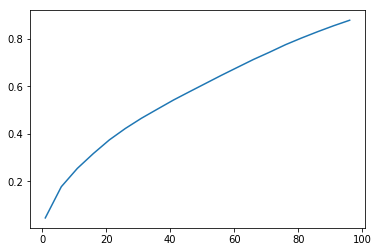

In [366]:
from sklearn.decomposition import PCA
explained_var = list()
for i in range(1,100,5):
    pca = PCA(n_components=i)
    pca.fit(X_train_imputed)
    explained_var.append(pca.explained_variance_ratio_.sum())
x = np.arange(1, 100, 5)
expained_var = np.array(explained_var)
plt.plot(x,explained_var)

In [362]:
pca = PCA(n_components=75) 
pca.fit(X_train_imputed)
pcadata = pca.fit_transform(X_train_imputed)
pca.explained_variance_ratio_.sum()

0.768712695991956

In [363]:
pcatest = pca.transform(X_test_imputed)

In [372]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    '''
    
    learner = learner.fit(X_train, y_train)
    
    # Get predictions on the test set(X_test), then get predictions on first 300 training samples
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:1000])
    
    # Compute accuracy on the first 300 training samples
    mse_train = mean_squared_error(y_train[:1000],predictions_train)
    
    #Compute accuracy on test set
    mse_test = mean_squared_error(y_test,predictions_test)
       
    print("MSE_train: %.4f" % mse_train)
    print("MSE_test: %.4f" % mse_test)
    print("Training score:%.4f" % learner.score(X_train,y_train))
    print("Test score:%.4f" % learner.score(X_test,y_test))
    #print(learner.feature_importances_)
    #for feat, importance in zip(X.columns, learner.feature_importances_):
        #print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

In [378]:
from sklearn import linear_model
#Initialize the model
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor(max_depth=3,min_samples_leaf=10,min_samples_split=10,max_leaf_nodes=8,random_state=42)
clf3 = clf = RandomForestRegressor(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
clf4 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

for clf in [clf4]:
        train_predict(clf, X_train_imputed, y_train, X_test_imputed, y_test)

ValueError: bad input shape (747633, 41)